In [1]:
import numpy as np # diziler ile çalışmak için eklendi
import pandas as pd # veri işlemede kullanmak için eklendi

import matplotlib.pyplot as plt  # görselleştirme için..
plt.style.use("seaborn-whitegrid")

import seaborn as sns  # görselleştirme için...

from collections import Counter #...

import warnings
warnings.filterwarnings("ignore")

In [2]:
# kod dosyası ile aynı dizindeki train ve test dosyalarından veriler okundu
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# train ve test verilerini modelimizi eğitmeye başlamadan önce temizleme/düzenleme işlemi yapmak için birleştiricez
# sonrasında test verilerini en son ayırıp modelimizin kontrolü için kullanacağız
# passenger'id ler eğitimi kısmında kullanılmayacağı için kaldırılacak fakat test aşamasında gerekli olacağı için elde tutulacak
test_PassengerId = test_df["PassengerId"]

In [3]:
# eğitim için kullanacağımız verilerin feature larına göz atmak için kullanıyoruz
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# dataframe içerisindeki veriler hakkında bilgi sahibi olmak için hızlıca (default:ilk beş veri) bakıyoruz
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# sayısal değerler içeren feature ların standart sapma, medyan gibi özelliklerine bakıyoruz
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Variable Description
1. PassengerId: her yolcu için farklı olan bir numara
1. Survived: yolcunun hayatta kalması (1) yada kalamaması (0)
1. Pclass: yolcu sınıfı (1,2,3)
1. Name: yolcunun isim
1. Sex: yolcunun cinsiyeti 
1. Age: yolcunun yaşı
1. SibSp: yolcunun sahip olduğu eş/kardeş sayısı
1. Parch: yolcunun sahip olduğu ebeveyn/çocuk sayısı 
1. Ticket: bilet numarası 
1. Fare: bilete ödenen para
1. Cabin: cabin numarası
1. Embarked: biniş yapılan liman (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
# feature lardaki verilerin tiplerine ve dolu/boş bilgisine bakıyoruz
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

grup sayısı belirli olan verilere categorical, olmayan ve numeric olan verilere ise numerical diyebiliriz.
Örnek olarak Pclass ın 3 farklı alabildiği değer vardır, Survived ın alabildiği ise 2 dir fakat Age in alabileceği birbirinden farklı çok sayıda değer olabilir. Sonraki adımlarda bu verilerin de nasıl categorical hale getirileceğine bakacağız.
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

categorical verilerden Cabin, Name, Ticket bilgileride kendi içerisinde birbirinden farklı fazla sayıda değerler içerdiğinden diğer verilerin hayatta kalma/kalmama daki etkilerine görselleştirme yardımı ile bakalım...

In [7]:
# feature'ı paramtre olarak alan ve içerisindeki verilerin dağılımını grafik olarak döndüren bir fonk. yazalım
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # bu ksımda dataframden ilgili feature'ı çekiyoruz
    var = train_df[variable]
    # feature daki verilerin gruplanarak sayılmasını sağlıyoruz
    varValue = var.value_counts()
    
    # görselleştirme kısmı
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

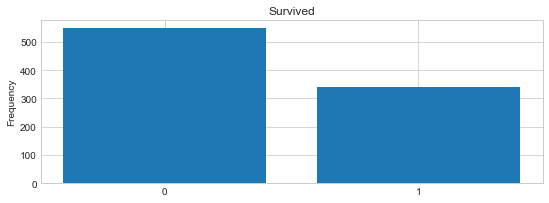

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


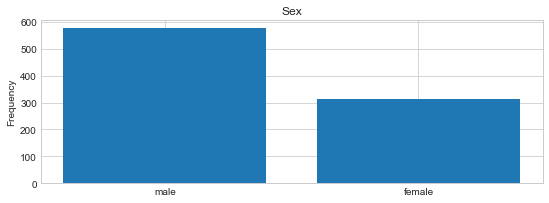

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


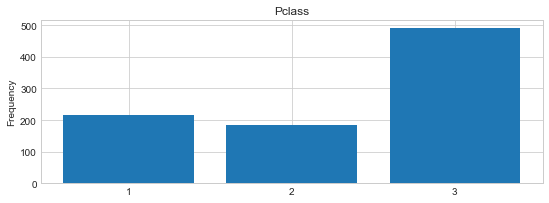

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


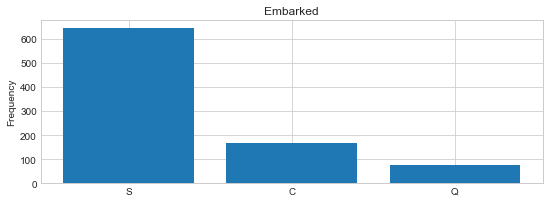

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


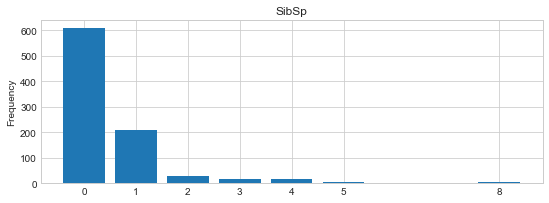

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


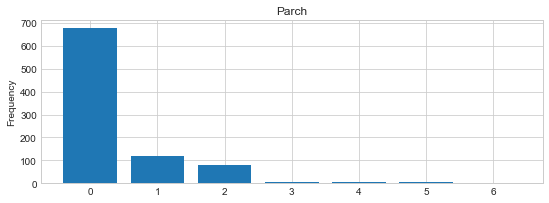

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
# fazla sayıda kategori içeren diğer  feature ların içerisindeki çeşitliliğe hızlıca bakalım
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



In [10]:
# numerical verilerdeki dağılımı toplu olarak görmek için fonk. yazalım
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

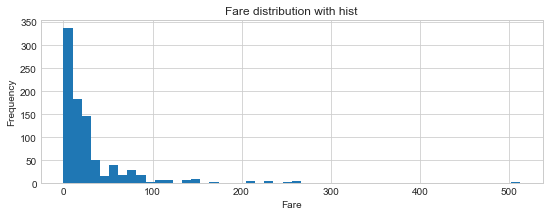

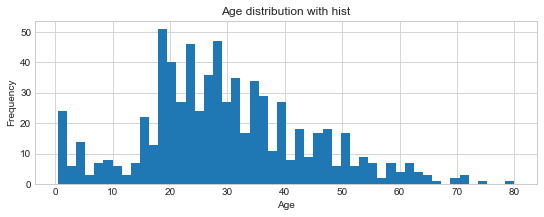

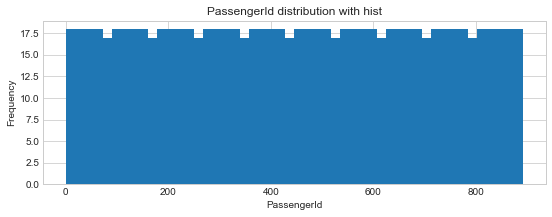

In [11]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

bu kısım ile belirli feature ların hayatta kalmadaki etkisini kontrol ediyoruz

In [12]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Missing Value
Kayıtlarda boş veri içeren alanların doldurulması sağlanacak

In [16]:
# Bu ksıım ile train ve test verileri birleştirilerek tek seferde makyajlama işlem yapılacak
train_df_len = len(train_df) # makyajlama işlemi bittikten sonra train/test verilerini tekrar ayırmak için oluşturduk
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [17]:
# boş veri içeren feaature ları hızlıca görelim
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [18]:
# bu feature lardaki boş verilerin sayısını kontrol edelim
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Fill Missing Value
Embarked ve Fare alanlarını doldurmaya çalışalım

In [19]:
# biniş yapılan liman bilgisi boş olan kayıtlarımız
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


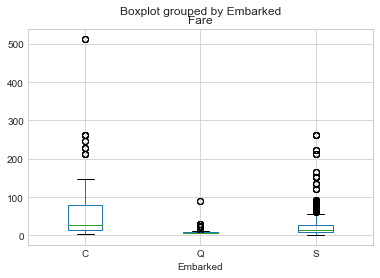

In [20]:
# C,Q,S limanlarından binen yolcuların ödedikleri paraya göre Fare:80 için en uygun liman C limanı olarak gözüküyor 
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [21]:
# Embarked alanındaki boş veriler "C" verisi ile dolduruldu ve boş veri olup olmadığı kontrolü yapıldı
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
# Fare alanı boş olan bir kayıt mevcut
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [23]:
# bu kaydın yolcu sınıfı ne olduğu bilindiğinden bu sınıfa ait olan verilerin ortalamasını alarak alanı dolduralım
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


</br>

## Fill Missing: Age Feature
Age alanının hangi diğer alanlar ile ilişkili olduğunu bulup kararımıza göre doldurma işlemini yapalım

In [24]:
# Age alanı boş olan 263 kayıt mevcut 
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


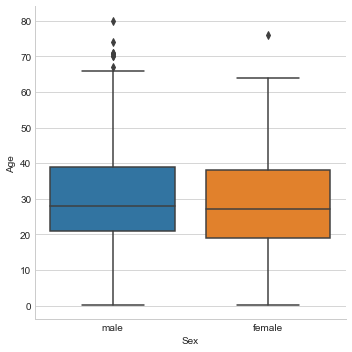

In [25]:
# cinsiyet ile yaş bilgileri arasında ilişki var mı kontrol edelim
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Grafikten de anlaşıldığı gibi erkek ve kadınların yaş dağılımları çok benzer gözükmektedir.</br>
Cinsiyete göre yaş ayrımı yapmak mümkün değildir.

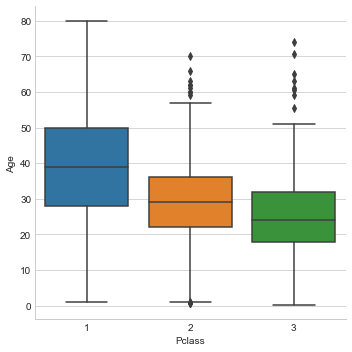

In [26]:
sns.factorplot(x = "Pclass", y = "Age", data = train_df, kind = "box")
plt.show()

1.sınıftaki yolcular 2.sınıf yolculardan daha yaşlıdır </br>
2.sınıf yolcularda 3.sınıf yolculardan daha yaşlıdır diyebiliriz.

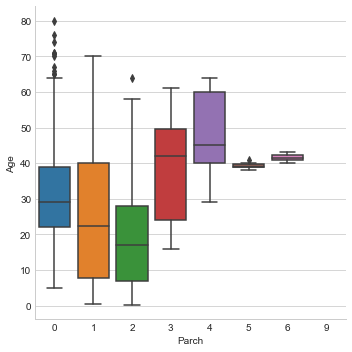

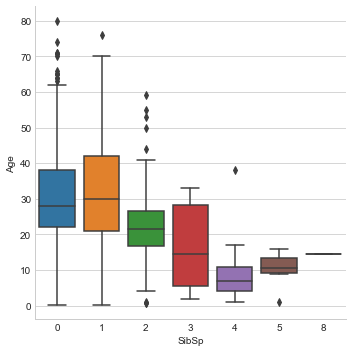

In [27]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

Görüldüğü üzere Parch ve SibSp sayılarına göre yaş dağılımları birbirlerinden farklıdır.

In [28]:
# Cinsiyet bilgisini type ını numeric olarak değiştiriyoruz
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

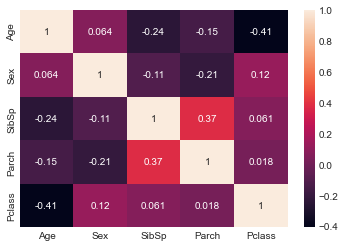

In [29]:
# "Age" alanının "Sex","SibSp","Parch","Pclass" alanları arasındaki ilişkiyi kontrol ediyoruz
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Haritada Age alanını kontrol ettiğimizde cinsiyet hariç diğer alanlarda göz ardı edilemeyecek oranlarda negatif ilişkinin olduğunu gözlemliyoruz.</br>
Bu alanları Age bilgisi boş olan kaytılarımızı doldurmak için kullanabiliriz.

In [30]:
# Cinsiyet bilgisini type ını numeric olarak değiştiriyoruz
train_df["Sex"] = ["male" if i == 1 else "female" for i in train_df["Sex"]]

In [31]:
# Age bilgisi boş olan kayıtların index bilgileri tutulur
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
# tutulan her index için
for i in index_nan_age:
    # bu indexdeki kaydın SibSp,Parch,Pclass bilgileri aynı olan diğer kayıtların Age bilgileirnin medyanı alınır
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [32]:
# tüm kayıtların Age bilgileri doldurulmuş oldu
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


</br>

# Visualization
Diğer Feature ların Survived feature ı ile aralarındaki ilişkiye bakalım
#### Sibsp -- Parch -- Age -- Fare -- Survived**

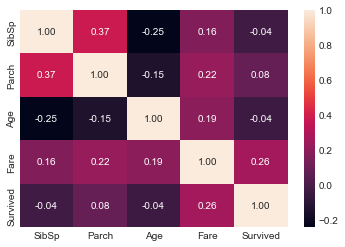

In [33]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare alanının Survived alanı ile ilişkisi var gibi gözüküyor (0.26)

#### SibSp -- Survived**

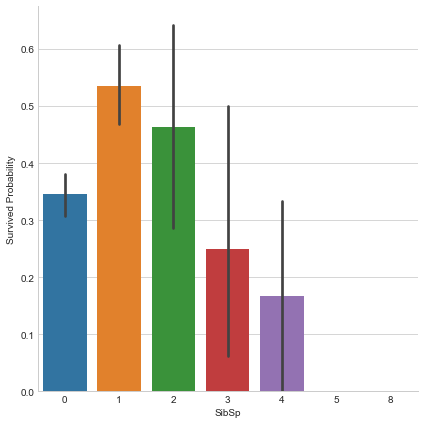

In [34]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

SibSp değeri 1 ve 2 olan yolcuların hayatta kalma oranları diğer yolculara göre daha fazla olduğu gözüküyor. </br>
Buna bağlı olarak SibSp değeri 1 ve 2 olanlar bir grup diğerlerini ayrı bir grup olarak yeni bir feature oluşturabiliriz.

#### Parch -- Survived**

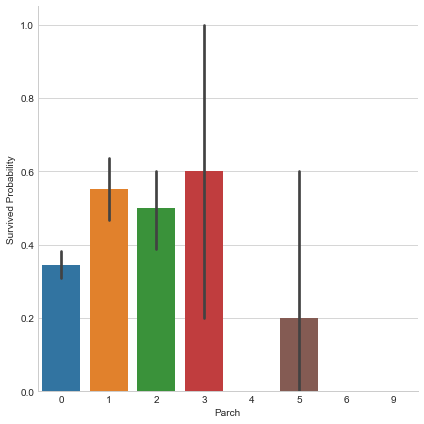

In [35]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

#### Age -- Survived**

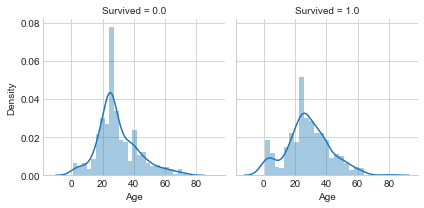

In [36]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

#### Pclass -- Age -- Survived**

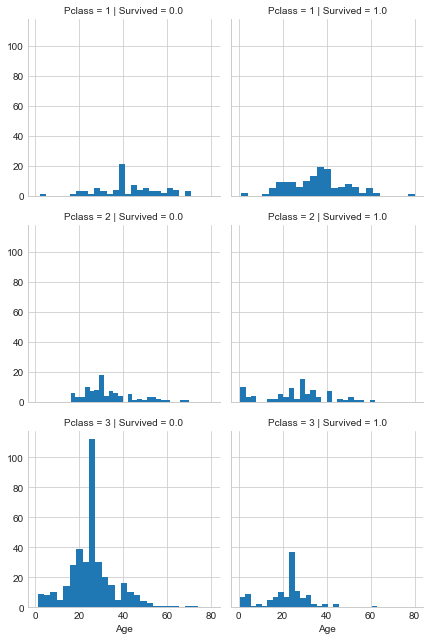

In [37]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 3)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

Grafiklere baktığımızda özellikle 1.sınıf ve 3.sınıf yolcularının hayatta kalma oranları kendi grupları içerisinde farklılık göstermektedir.</br>
Modelimizi eğitirken Pclass feature ını kullanmak için güzel bir işarettir.

#### Embarked -- Sex -- Pclass -- Survived**

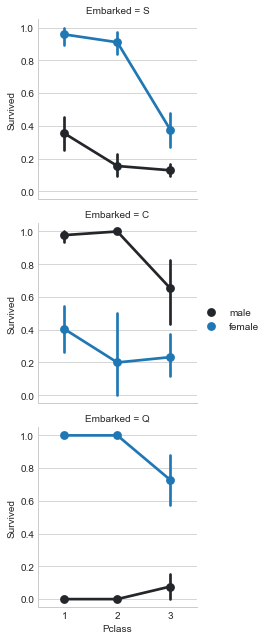

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 3)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

Kadın yolcular erkek yolculardan çok daha yüksek hayatta kalma oranına sahiptir.</br>
Biniş limanın da hayatta kalma oranına etkisi olduğu söylenebilir.

#### Embarked -- Sex -- Fare -- Survived**

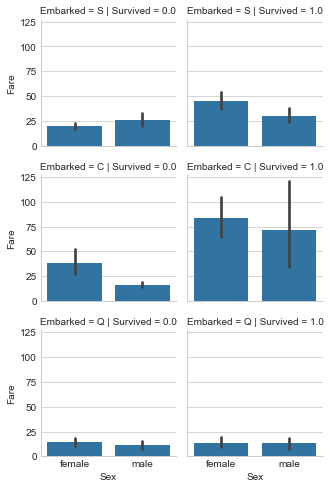

In [39]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Q limanı için belirgin olmasada diğer limanlarda bilete ödenen ücretin hayatta kalma oranına belirgin bir etki yarattığını görüyoruz.

</br>

## Feature Engineering
Alanlardaki verileri inceleyerek eğitimde kuıllanılabilecek yeni alanlar üretmeye çalışalım.

#### Name -- Title
İsimlerde bulunan ünvan kısaltmaları hayatta kalmada etkili olabilir mi?

In [40]:
# Moran, Mr. James ---> Mr
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

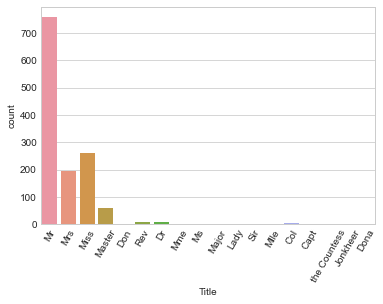

In [41]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [42]:
# yeni oluşturmuş olduğumuz "tittle" alanını categorical hale getirelim
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

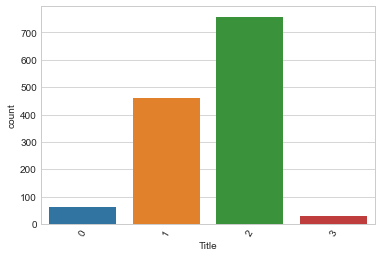

In [43]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

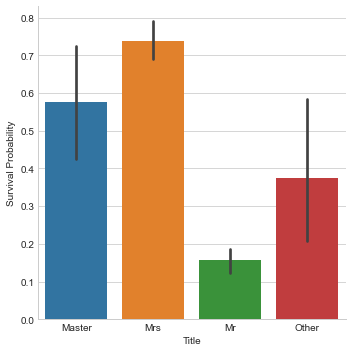

In [44]:
# Yolcuların sahip oldukları ünvanların hayatta kalma oranlarına etkisine bakalım
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [45]:
# Artık datamızdan Name alanını kaldırabiliriz
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [47]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


</br>

#### SibSp - Parch --> Family Size

In [48]:
# yolcunun sahip olduğu ailenin boyutu (kendisi dahil +1) 
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

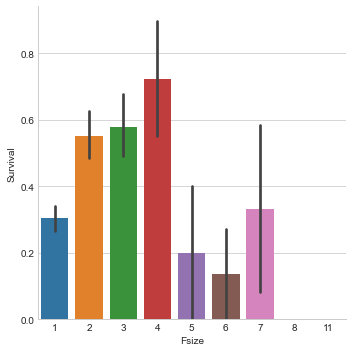

In [49]:
# Fsize ın Survived ile olan iliişkisine bakalım
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [50]:
# Fsize ı (2,3,4) olanların diğerlerine oranla hayatta kalma olasılığı daha yüksek. Verimizi categorical hale getirelim
train_df["family_size"] = [1 if 1 < i < 5 else 0 for i in train_df["Fsize"]]

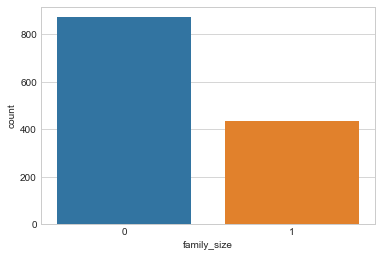

In [51]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

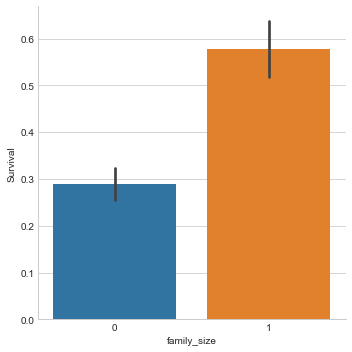

In [52]:
# categorical hale getirdiğimiz Fsize feature ının hayatta kalmadaki etkisine bakalım
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [53]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1,0


</br>

#### Embarked

In [54]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,1,0,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,1,0,0,0,1


</br>

#### Ticket

In [55]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [56]:
# Bilet bilgilerinin ön kısmındaki verilerden yola çıkarak yeni bir alan oluşturalım "A/5. 2151" ---> "A5"
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [57]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [58]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<br>

#### Pclass

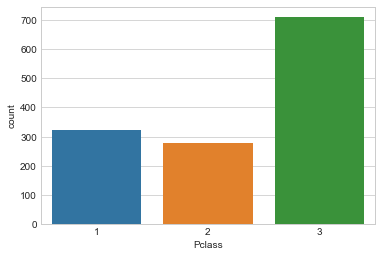

In [59]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [60]:
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<br>

#### Sex

In [61]:
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<br>

#### Drop Passenger ID and Cabin 

In [62]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    float64
 1   Age            1309 non-null   float64
 2   SibSp          1309 non-null   int64  
 3   Parch          1309 non-null   int64  
 4   Fare           1309 non-null   float64
 5   Title_0        1309 non-null   uint8  
 6   Title_1        1309 non-null   uint8  
 7   Title_2        1309 non-null   uint8  
 8   Title_3        1309 non-null   uint8  
 9   Fsize          1309 non-null   int64  
 10  family_size_0  1309 non-null   uint8  
 11  family_size_1  1309 non-null   uint8  
 12  Embarked_C     1309 non-null   uint8  
 13  Embarked_Q     1309 non-null   uint8  
 14  Embarked_S     1309 non-null   uint8  
 15  T_A            1309 non-null   uint8  
 16  T_A4           1309 non-null   uint8  
 17  T_A5           1309 non-null   uint8  
 18  T_AQ3   